In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing

In [2]:
df = pd.read_excel('beta keto_combine.xlsx')
#df.corr(method ='kendall')

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

C:\Users\A B C\AppData\Local\Temp\ipykernel_10176\4172614641.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
df

,mol,apol,ast_fraglike,ast_fraglike_ext,ast_violation,ast_violation_ext,a_acc,a_acid,a_aro,a_base,...,vsa_base,vsa_don,vsa_hyd,vsa_other,vsa_pol,Weight,weinerPath,weinerPol,zagreb,Label
0,Brc1cc(CN(C(=O)Nc2ccccc2)c2ccc(Cl)cc2)c(O)cc1,54.902687,0,0,2,3,2,0,18,0,...,0,5.682576,314.04636,17.440542,32.816418,431.71698,1671,38,132,1
1,O=[N+]([O-])c1n(CC(OC(=O)/C=C/c2ccc(-c3ccccc3)...,59.230652,0,0,2,3,2,0,17,0,...,0,0.000000,292.42154,73.524429,19.249496,391.42700,2779,41,146,1
2,Brc1cc(CN(C(=O)Nc2ccccc2)c2ccc(F)cc2)c(O)cc1,53.279690,0,0,2,3,2,0,18,0,...,0,5.682576,300.87415,17.440542,32.816418,415.26199,1671,38,132,1
3,Brc1cc(CN(C(=O)Nc2ccccc2)c2ccc(Br)cc2)c(O)cc1,55.772690,0,0,2,3,2,0,18,0,...,0,5.682576,325.82172,17.440542,32.816418,476.16800,1671,38,132,1
4,Brc1c(N(C(=O)Nc2ccccc2)Cc2c(O)ccc(Br)c2)cccc1,55.772690,0,0,2,3,2,0,18,0,...,0,5.682576,325.82172,17.440542,32.816418,476.16800,1633,39,132,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,Clc1c(Cl)cc2N(C)C(=Nc3ccc(OC(F)(F)F)cc3)N(Cc3c...,70.010483,0,0,4,6,7,0,23,0,...,0,5.682576,364.48294,44.312679,72.596916,577.35400,5499,61,212,0
882,S(=O)(=O)(Nc1ncsc1)c1c(F)cc(Oc2c(-c3n(C4CN(C)C...,68.973274,0,0,3,4,5,0,22,0,...,0,8.075207,375.01788,23.799927,55.195347,571.55096,4754,61,212,0
883,Brc1ccc(-c2nn(-c3ccccc3)c3NC4=C(C(=O)OC4)C(c4c...,77.403030,0,0,3,4,5,0,23,0,...,0,5.682576,405.32117,28.402819,36.181805,574.43097,4013,71,212,0
884,Clc1c(C)cc(S(=O)(=O)N=C(NN=CC#Cc2ccccc2)N)c(SC...,75.103859,0,0,3,5,6,0,18,0,...,0,27.163528,340.96231,74.395142,81.683807,575.49701,5110,56,192,0


In [4]:
X = df.iloc[ : , 1 : 208]
y = df.iloc[:, -1:]

In [5]:
non_negative =X[X>=0]

In [6]:
ddd = non_negative.fillna(value = 0)

In [7]:
norma =  preprocessing.normalize(ddd)
norma

array([[0.02718382, 0.        , 0.        , ..., 0.01881484, 0.06535681,
        0.00049513],
       [0.01969609, 0.        , 0.        , ..., 0.01363381, 0.04854968,
        0.00033253],
       [0.02666843, 0.        , 0.        , ..., 0.01902039, 0.06607082,
        0.00050054],
       ...,
       [0.01804377, 0.        , 0.        , ..., 0.01655113, 0.04942028,
        0.        ],
       [0.01407402, 0.        , 0.        , ..., 0.01049407, 0.03597965,
        0.        ],
       [0.01453182, 0.        , 0.        , ..., 0.01120258, 0.03506895,
        0.        ]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norma, y, test_size= 0.3 )
print(f" the shape of training set: {X_train.shape}")
print(f" the shape of testing set: {X_test.shape}")

 the shape of training set: (620, 188)
 the shape of testing set: (266, 188)


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import roc_auc_score

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
#from mlxtend.classifier import StackingCVClassifier

Fitting estimator with 188 features.
Fitting estimator with 187 features.
Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
Fitting estimator with 173 features.
Fitting estimator with 172 features.
Fitting estimator with 171 features.
Fitting estimator with 170 features.
Fitting estimator with 169 features.
Fitting estimator with 168 features.
Fitting estimator with 167 features.
Fitting estimator with 166 features.
Fitting estimator with 165 features.
Fitting estimator with 164 features.
Fitting estimator with 163 features.
Fitting estimator with 162 features.
F

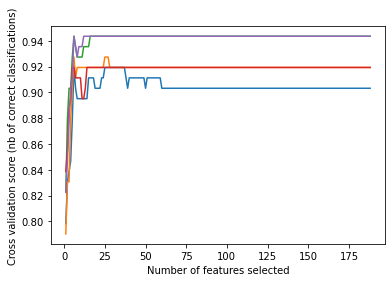

In [10]:
# EXTREMELY SLOW FOR RFE
# classifications
rfecv = RFECV(estimator=SVC(kernel="linear"), step=1, cv=5, n_jobs=-1, verbose=3)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_) # 24

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.savefig("rfevb_without_02.jpg",dpi=300)

In [13]:
param_grid = {'n_neighbors': np.arange(1, 11)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("The ACC of KNN after selection: {}".format(grid_search.score(X_test, y_test)))

The ACC of KNN after selection: 0.9962406015037594


In [14]:
print("Num Features: %s" % (rfecv.n_features_))
print("Selected Features: %s" % (rfecv.support_))
print("Feature Ranking: %s" % (rfecv.ranking_))

Num Features: 23
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False False False False False False  True False False False False False
 False False False False False False  True  True False  True  True False
 False False False False False False False False False False False False
  True False Fa

In [15]:
X_train_widout_std_selected = rfecv.transform(X_train)
X_test_widout_std_selected = rfecv.transform(X_test)

In [17]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['specs', 'Score']  #naming the dataframe columns
print(featureScores.nlargest(23,'Score'))  #print 10 best features

            specs     Score
118    PEOE_VSA+0  9.020839
202        Weight  8.690169
142  PEOE_VSA_POS  8.245247
156     Q_VSA_HYD  7.946312
160     Q_VSA_POS  7.946312
193      vdw_area  7.946312
194       vdw_vol  7.479481
185      SMR_VSA5  6.925741
199       vsa_hyd  6.742344
138  PEOE_VSA_HYD  6.696640
176    SlogP_VSA7  6.516533
178    SlogP_VSA9  3.539669
203    weinerPath  3.043193
187      SMR_VSA7  2.815532
205        zagreb  2.027379
188          TPSA  1.722090
14           a_IC  1.323719
201       vsa_pol  1.302734
141  PEOE_VSA_POL  1.253233
0            apol  1.222134
173    SlogP_VSA4  1.015356
88          h_pKb  0.999102
182      SMR_VSA2  0.968783
